In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [33]:
np.random.seed(42)

# Storing Data and Analyzing data

In [34]:
#data is sotored into a pandas dataframe
data = pd.read_csv('Data/Sleep_health_and_lifestyle_dataset.csv')
data

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,370,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
370,371,Female,59,Nurse,8.0,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
371,372,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea
372,373,Female,59,Nurse,8.1,9,75,3,Overweight,140/95,68,7000,Sleep Apnea


In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB


Inital inspection reveals duplicate data, so they must be removed

In [36]:
#removing person ID to properly find duplicates
clean_data = data.drop('Person ID',axis = 1)
clean_data = clean_data.drop_duplicates()
clean_data = clean_data.reset_index(drop=True)
clean_data.head(8)

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
4,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
5,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,NaN
6,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,NaN
7,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,NaN


In [37]:
clean_data.head(8).to_csv('t2', index=False)

In [38]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Gender                   132 non-null    object 
 1   Age                      132 non-null    int64  
 2   Occupation               132 non-null    object 
 3   Sleep Duration           132 non-null    float64
 4   Quality of Sleep         132 non-null    int64  
 5   Physical Activity Level  132 non-null    int64  
 6   Stress Level             132 non-null    int64  
 7   BMI Category             132 non-null    object 
 8   Blood Pressure           132 non-null    object 
 9   Heart Rate               132 non-null    int64  
 10  Daily Steps              132 non-null    int64  
 11  Sleep Disorder           59 non-null     object 
dtypes: float64(1), int64(6), object(5)
memory usage: 12.5+ KB


Next, insted of using Nan data as none, will properly fill with string 'None'

In [39]:
clean_data = clean_data.fillna('None')


In [40]:
clean_data.head(8)


,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
3,Male,28,Software Engineer,5.9,4,30,8,Obese,140/90,85,3000,Insomnia
4,Male,29,Teacher,6.3,6,40,7,Obese,140/90,82,3500,Insomnia
5,Male,29,Doctor,7.8,7,75,6,Normal,120/80,70,8000,None
6,Male,29,Doctor,6.1,6,30,8,Normal,120/80,70,8000,None
7,Male,29,Doctor,6.0,6,30,8,Normal,120/80,70,8000,None


Now to replace string data to numerical repesentation

In [41]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

#columns to be encoded
columns_to_encode = ['Gender', 'BMI Category', 'Sleep Disorder', 'Blood Pressure', 'Occupation']

# Fit and transform the specified columns
clean_data_encoded = ordinal_encoder.fit_transform(clean_data[columns_to_encode])

# Creating a new DataFrame with the encoded values
clean_data_encoded_df = pd.DataFrame(clean_data_encoded, columns=columns_to_encode)

# Replacing the original columns in clean_data with the encoded columns
clean_data[columns_to_encode] = clean_data_encoded_df

clean_data

,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1.0,27,9.0,6.1,6,42,6,3.0,11.0,77,4200,1.0
1,1.0,28,1.0,6.2,6,60,8,0.0,9.0,75,10000,1.0
2,1.0,28,6.0,5.9,4,30,8,2.0,22.0,85,3000,2.0
3,1.0,28,9.0,5.9,4,30,8,2.0,22.0,85,3000,0.0
4,1.0,29,10.0,6.3,6,40,7,2.0,22.0,82,3500,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
127,0.0,59,5.0,8.0,9,75,3,3.0,23.0,68,7000,1.0
128,0.0,59,5.0,8.1,9,75,3,3.0,23.0,68,7000,1.0
129,0.0,59,5.0,8.2,9,75,3,3.0,23.0,68,7000,2.0
130,0.0,59,5.0,8.0,9,75,3,3.0,23.0,68,7000,2.0


In [42]:
clean_data.head(8).to_csv('t3',index=False)

In [43]:
ordinal_encoder.categories_

[array(['Female', 'Male'], dtype=object),
 array(['Normal', 'Normal Weight', 'Obese', 'Overweight'], dtype=object),
 array(['Insomnia', 'None', 'Sleep Apnea'], dtype=object),
 array(['115/75', '115/78', '117/76', '118/75', '118/76', '119/77',
        '120/80', '121/79', '122/80', '125/80', '125/82', '126/83',
        '128/84', '128/85', '129/84', '130/85', '130/86', '131/86',
        '132/87', '135/88', '135/90', '139/91', '140/90', '140/95',
        '142/92'], dtype=object),
 array(['Accountant', 'Doctor', 'Engineer', 'Lawyer', 'Manager', 'Nurse',
        'Sales Representative', 'Salesperson', 'Scientist',
        'Software Engineer', 'Teacher'], dtype=object)]

Now look for correlations, in sleep quality, disorder, Sleep duration

In [44]:
corr_matrix = clean_data.corr()
print(corr_matrix['Quality of Sleep'].sort_values(ascending=False))
print('---------------')
print(corr_matrix['Sleep Disorder'].sort_values(ascending=False))
print('---------------')
print(corr_matrix['Sleep Duration'].sort_values(ascending=False))

Quality of Sleep           1.000000
Sleep Duration             0.869302
Age                        0.488256
Physical Activity Level    0.289501
Daily Steps                0.147607
Sleep Disorder             0.088280
Blood Pressure            -0.211129
Gender                    -0.229555
BMI Category              -0.314360
Occupation                -0.315490
Heart Rate                -0.660056
Stress Level              -0.883948
Name: Quality of Sleep, dtype: float64
---------------
Sleep Disorder             1.000000
Physical Activity Level    0.318777
Daily Steps                0.224522
Heart Rate                 0.146759
Age                        0.121151
Blood Pressure             0.120345
Sleep Duration             0.110292
Quality of Sleep           0.088280
BMI Category               0.029574
Stress Level              -0.016588
Occupation                -0.058671
Gender                    -0.170175
Name: Sleep Disorder, dtype: float64
---------------
Sleep Duration             1

Based off the alaysis the best preidictors of poor sleep are: Sleep Duration,Age,Physical Activity Level,Heart Rate, and Stress Level

# Training the model

Now split the data set into testing and training

In [45]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(clean_data[['Sleep Duration','Age','Physical Activity Level','Heart Rate','Stress Level']], clean_data[['Quality of Sleep']],
                                                    test_size=.3 ,random_state=42)


In [46]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
lin_reg.score(X_test,y_test)



0.8875508906599238

In [47]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=8, solver="cholesky")
ridge_reg.fit(X_train,y_train)
ridge_reg.score(X_test,y_test)

0.9032674289043929

In [48]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=.1)
lasso_reg.fit(X_train, y_train)
lasso_reg.score(X_test,y_test)




0.9084223634848193

In [49]:
from sklearn.tree import DecisionTreeClassifier
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)
tree_clf.score(X_test,y_test)

0.975

In [50]:
from sklearn.tree import export_graphviz
export_graphviz(
tree_clf,
out_file="q.dot",
feature_names=['Sleep Duration','Age','Physical Activity Level','Heart Rate','Stress Level'],
rounded=True,
filled=True
)

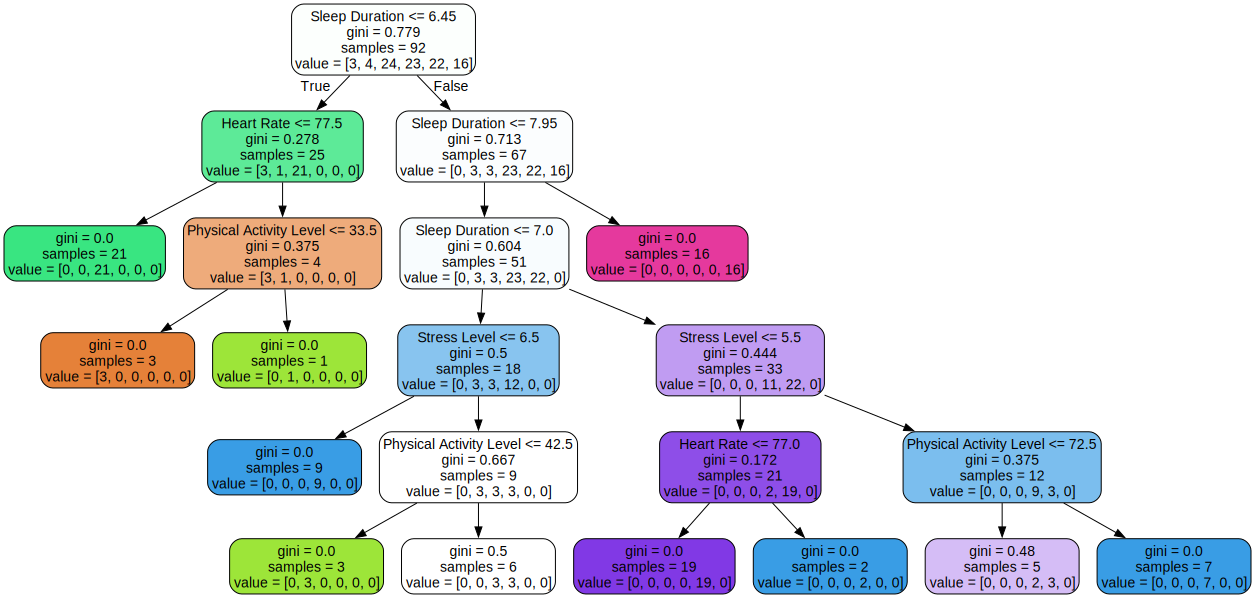

In [51]:
from graphviz import Source
Source.from_file("q.dot")


# Taking user input

Decision tree was found to be the most accurate, next gather real data from users

In [52]:
Sleep_Duration = float(input('Please enter how many hours you sleep a night: '))
Age = float(input('Please enter your age: '))
Physical_Activity_Level = float(input('Please enter your actvity level: '))
Heart_Rate = float(input('Please enter your resting heart reat: '))
Stress_Level = float(input('Please enter your average stress level: '))

ValueError: could not convert string to float: ''

In [ ]:
def pd(Sleep_Duration,Age,Physical_Activity_Level,Heart_Rate,Stress_Level):
    prdicted_qof = tree_clf.predict([[Sleep_Duration,Age,Heart_Rate,Stress_Level]])
    return prdicted_qof

In [ ]:
qos = pd(Sleep_Duration,Age,Heart_Rate,Stress_Level)


c:\Users\chris\anaconda3\envs\homl3\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


6